In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import yfinance as yf


In [52]:
# Load Apple stock data using yfinance
data = yf.download('AAPL', start='2024-01-01', end=datetime.today().strftime('%Y-%m-%d'))
data.reset_index(inplace=True)
data['Target'] = data['Close']

[*********************100%***********************]  1 of 1 completed


In [64]:
# Load Apple stock data using yfinance
data = yf.download('AAPL', start='2024-01-01', end=datetime.today().strftime('%Y-%m-%d'))
data.reset_index(inplace=True)
data['Target'] = data['Close']

[*********************100%***********************]  1 of 1 completed


In [67]:
# Define features and target
features = data[['Open', 'Volume']].values  # Use values to remove feature names
target = data['Target'].values

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features, target, data['Date'], test_size=0.2, random_state=42)

In [71]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Define Buy/Sell/Hold indicators
threshold = 0.02  # 2% threshold for Buy/Sell
indicators = []
for actual, predicted in zip(y_test, y_pred):
    if predicted > actual * (1 + threshold):
        indicators.append('BUY')
    elif predicted < actual * (1 - threshold):
        indicators.append('SELL')
    else:
        indicators.append('HOLD')

In [74]:
# Create a DataFrame to show actual prices, predicted prices, and indicators
results = pd.DataFrame({
    'Date': date_test.values,
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Indicator': indicators
})

In [75]:
# Print the results
print(results.head())

        Date  Actual Price  Predicted Price Indicator
0 2024-02-14    184.149994       185.413639      HOLD
1 2024-09-20    228.199997       233.632437       BUY
2 2024-11-19    228.279999       226.883536      HOLD
3 2024-09-26    227.520004       227.209612      HOLD
4 2024-11-01    222.910004       221.252014      HOLD


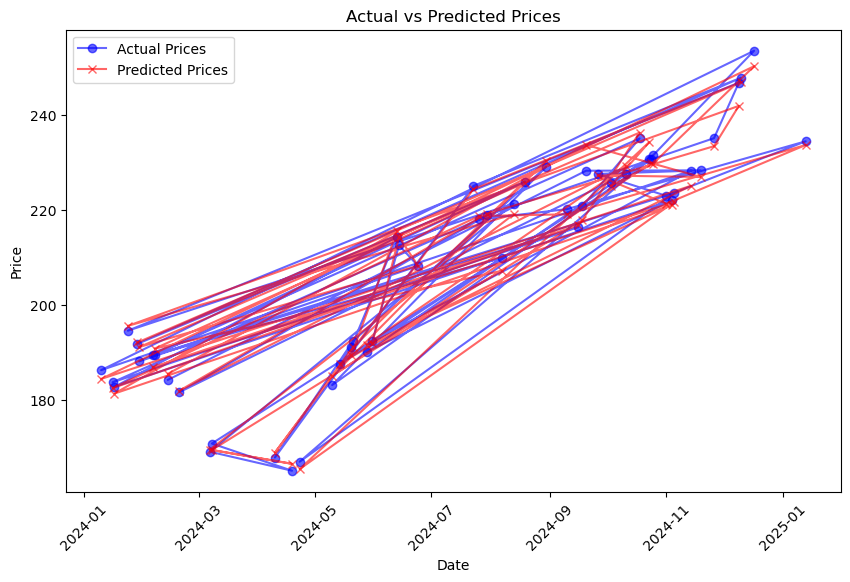

In [76]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(results['Date'], results['Actual Price'], label="Actual Prices", color="blue", alpha=0.6, marker='o')
plt.plot(results['Date'], results['Predicted Price'], label="Predicted Prices", color="red", alpha=0.6, marker='x')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

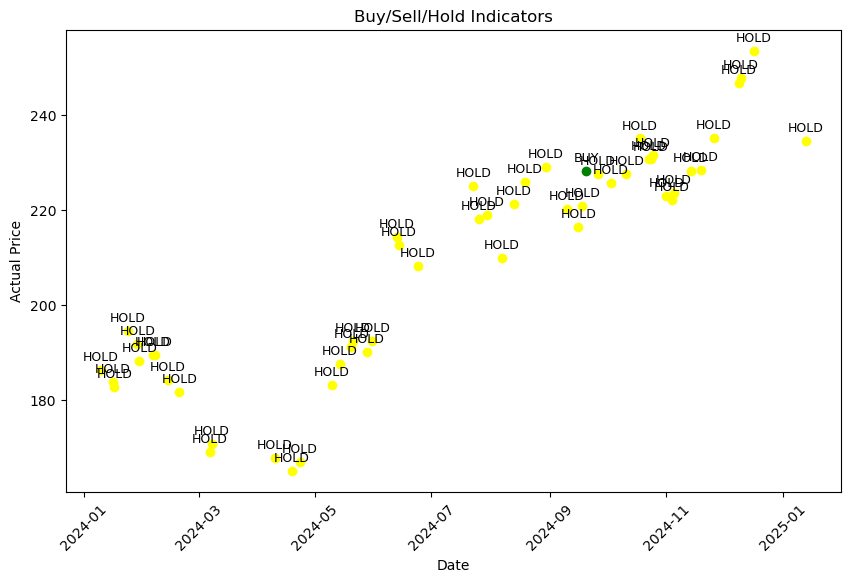

In [77]:
# Visualize Buy/Sell/Hold Indicators
plt.figure(figsize=(10, 6))
for i, (date, actual, indicator) in enumerate(zip(results['Date'], results['Actual Price'], results['Indicator'])):
    color = 'green' if indicator == 'BUY' else 'red' if indicator == 'SELL' else 'yellow'
    plt.scatter(date, actual, color=color)
    plt.text(date, actual + 2, indicator, fontsize=9, ha='center')  # Adding labels above points

plt.title("Buy/Sell/Hold Indicators")
plt.xlabel("Date")
plt.ylabel("Actual Price")
plt.xticks(rotation=45)
plt.show()

In [78]:
# Predict for future dates using the last available Open and Volume data
last_open = data['Open'].iloc[-1]
last_volume = data['Volume'].iloc[-1]
future_data = pd.DataFrame({
    'Date': [datetime.today() + timedelta(days=i) for i in range(1, 11)],  # Future dates from today
    'Open': [last_open] * 10,  # Use the last known Open price
    'Volume': [last_volume] * 10  # Use the last known Volume
})

In [79]:
# Make future predictions
future_predictions = model.predict(future_data[['Open', 'Volume']].values)  # Convert to values to avoid feature name warning

In [80]:
# Define future Buy/Sell/Hold indicators
future_indicators = []
for open_price, predicted in zip(future_data['Open'].to_numpy(), future_predictions):
    open_price = open_price.item()  # Ensure open_price is a scalar
    if predicted > open_price * (1 + threshold):
        future_indicators.append('BUY')
    elif predicted < open_price * (1 - threshold):
        future_indicators.append('SELL')
    else:
        future_indicators.append('HOLD')

In [49]:
# Display future predictions with indicators
future_results = pd.DataFrame({
    'Date': future_data['Date'],
    'Future Open': future_data['Open'],
    'Future Volume': future_data['Volume'],
    'Predicted Close Price': future_predictions,
    'Indicator': future_indicators
})

print("Future Predictions:")
print(future_results)

Future Predictions:
                        Date                                      Future Open  \
0 2025-01-16 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
1 2025-01-17 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
2 2025-01-18 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
3 2025-01-19 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
4 2025-01-20 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
5 2025-01-21 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
6 2025-01-22 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
7 2025-01-23 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
8 2025-01-24 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   
9 2025-01-25 15:01:11.637584  Ticker
AAPL    234.75
Name: 509, dtype: float64   

                                     Future Volume  Predicted Close Price  \
0  Ticker
A

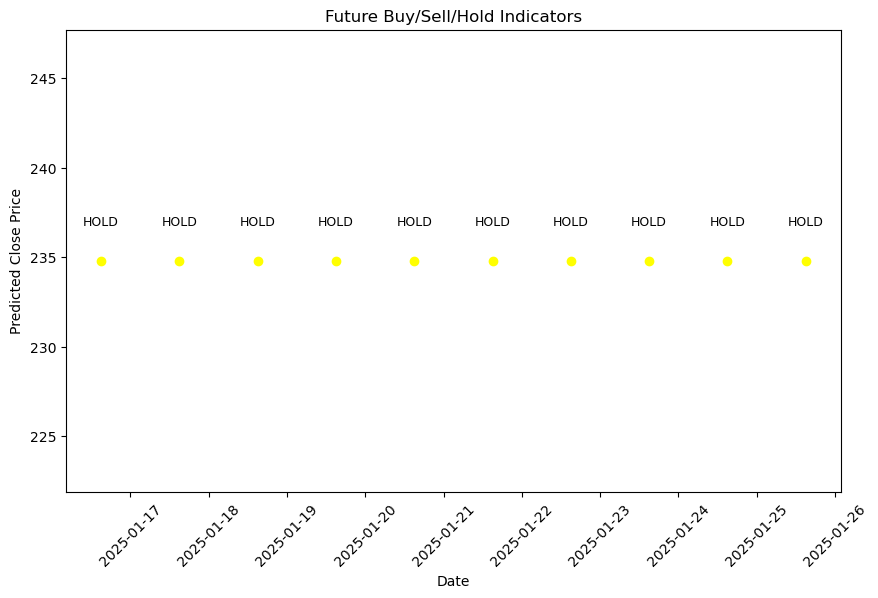

In [81]:
# Visualize future Buy/Sell/Hold Indicators
plt.figure(figsize=(10, 6))
for date, predicted, indicator in zip(future_results['Date'], future_results['Predicted Close Price'], future_results['Indicator']):
    color = 'green' if indicator == 'BUY' else 'red' if indicator == 'SELL' else 'yellow'
    plt.scatter(date, predicted, color=color)
    plt.text(date, predicted + 2, indicator, fontsize=9, ha='center')  # Adding labels above points

plt.title("Future Buy/Sell/Hold Indicators")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.xticks(rotation=45)
plt.show()


In [82]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.5153366978690688
R-squared: 0.9935672242568037
